# Austin Wayling

## Research question/interests

I have always loved following sports and stats and my favorite is baseball. The movie Moneyball introduced me to the idea of a team using data analysis to compete despite having a substantially smaller budget. Since then players have approached the game through a different lense causing the way the game is played to change. I am interested in looking into trends throughout the 150 year history of baseball and if the current declining offense is a cause for concern or not.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.__version__

'1.3.2'

In [4]:
batting = pd.read_csv("../data/raw/Batting.csv")

In [5]:
batting

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108784,zimmebr02,2020,1,BAL,AL,2,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108785,zimmejo02,2020,1,DET,AL,3,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108786,zimmeky01,2020,1,KCA,AL,16,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108787,zuberty01,2020,1,KCA,AL,23,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
people = pd.read_csv("../data/raw/People.csv")

In [7]:
pitching = pd.read_csv("../data/raw/Pitching.csv")

In [8]:
salaries = pd.read_csv("../data/raw/Salaries.csv")

In [9]:
fielding = pd.read_csv("../data/raw/Fielding.csv")

# Milestone 3

## Task 1 EDA

In [10]:
batting.shape

(108789, 22)

In [11]:
people.shape

(20343, 24)

In [12]:
pitching.shape

(48399, 30)

In [13]:
fielding.shape

(144768, 18)

In [14]:
people.describe()

,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height
count,20232.00000,20064.000000,19924.000000,9953.000000,9952.000000,9951.000000,19527.000000,19607.000000
mean,1935.16469,6.631280,15.615840,1966.792726,6.477090,15.522360,187.949096,72.357321
std,42.99697,3.463585,8.762774,33.211640,3.531599,8.788588,22.421965,2.617070
min,1820.00000,1.000000,1.000000,1872.000000,1.000000,1.000000,65.000000,43.000000
25%,1897.00000,4.000000,8.000000,1943.000000,3.000000,8.000000,172.000000,71.000000
50%,1943.00000,7.000000,16.000000,1969.000000,6.000000,15.000000,185.000000,72.000000
75%,1974.00000,10.000000,23.000000,1994.000000,10.000000,23.000000,200.000000,74.000000
max,2001.00000,12.000000,31.000000,2021.000000,12.000000,31.000000,320.000000,83.000000


In [15]:
batting.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,108789.000000,108789.000000,108789.000000,108789.000000,108789.000000,108789.000000,108789.000000,108789.000000,108789.000000,108033.000000,106421.000000,85248.000000,108789.000000,106689.000000,72139.000000,105973.000000,102721.000000,72686.000000,83348.000000
mean,1967.221631,1.078914,50.740488,139.241320,18.483496,36.388605,6.202024,1.247075,2.850150,16.790388,2.918775,1.177353,12.842907,20.559814,1.055227,1.057958,2.197087,1.022893,2.893495
std,39.747437,0.286916,46.889589,183.602089,28.043230,52.188884,9.627314,2.595462,6.368678,26.225046,7.608039,2.682099,20.595082,28.514873,2.709589,2.291269,4.154759,1.930262,4.672691
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1937.000000,1.000000,12.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1976.000000,1.000000,34.000000,46.000000,4.000000,8.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2001.000000,1.000000,79.000000,224.000000,27.000000,56.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000
max,2020.000000,5.000000,165.000000,716.000000,198.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


In [16]:
pitching.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,48399.000000,48399.000000,48399.000000,48399.000000,48399.000000,48399.000000,48399.000000,48399.000000,48399.000000,48399.000000,...,33821.000000,48399.000000,47665.000000,48399.000000,48396.000000,48399.000000,48399.000000,29212.000000,29212.000000,28081.000000
mean,1972.196781,1.081035,4.550073,4.550073,23.470754,9.151181,2.931280,0.418500,1.481539,244.894895,...,2.251234,2.575322,2.357957,0.292609,349.414807,6.216430,41.544929,2.660003,2.141106,5.753641
std,38.408926,0.287923,5.707027,4.913383,18.532130,12.129555,6.873115,1.076348,4.968260,252.987651,...,2.703067,3.659715,3.136546,0.740074,354.282289,9.864816,42.499043,3.237716,2.345834,6.287859
min,1871.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1945.000000,1.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,47.000000,...,0.000000,0.000000,0.000000,0.000000,71.000000,0.000000,10.000000,0.000000,0.000000,1.000000
50%,1983.000000,1.000000,2.000000,3.000000,21.000000,2.000000,0.000000,0.000000,0.000000,158.000000,...,1.000000,1.000000,1.000000,0.000000,229.000000,3.000000,27.000000,1.000000,1.000000,4.000000
75%,2005.000000,1.000000,7.000000,7.000000,35.000000,16.000000,2.000000,0.000000,1.000000,375.000000,...,3.000000,4.000000,3.000000,0.000000,538.000000,8.000000,65.000000,4.000000,3.000000,8.000000
max,2020.000000,5.000000,60.000000,48.000000,106.000000,75.000000,75.000000,16.000000,62.000000,2040.000000,...,23.000000,83.000000,54.000000,16.000000,2906.000000,84.000000,519.000000,27.000000,17.000000,47.000000


In [17]:
salaries.describe()

,yearID,salary
count,26428.000000,2.642800e+04
mean,2000.878727,2.085634e+06
std,8.909314,3.455348e+06
min,1985.000000,0.000000e+00
25%,1994.000000,2.947020e+05
50%,2001.000000,5.500000e+05
75%,2009.000000,2.350000e+06
max,2016.000000,3.300000e+07


In [18]:
fielding.describe()

,yearID,stint,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
count,144768.000000,144768.000000,144768.000000,98612.000000,114839.000000,144768.000000,144768.000000,144767.000000,144768.00000,11709.000000,1169.000000,8922.000000,8922.000000,1169.000000
mean,1964.755257,1.077683,35.029426,26.250375,701.955059,81.828795,34.421840,3.713996,7.15252,5.269792,10.473909,25.199059,13.705783,0.956373
std,41.867356,0.284705,41.129545,40.332710,1046.790281,184.388800,78.453239,7.788602,19.39990,9.306995,11.016078,31.217453,19.736831,1.623557
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1931.000000,1.000000,5.000000,0.000000,53.000000,2.000000,1.000000,0.000000,0.00000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,1975.000000,1.000000,19.000000,7.000000,216.000000,9.000000,7.000000,1.000000,1.00000,2.000000,7.000000,13.000000,6.000000,0.000000
75%,2001.000000,1.000000,47.000000,32.000000,770.000000,72.000000,26.000000,4.000000,3.00000,6.000000,16.000000,39.000000,19.000000,1.000000
max,2020.000000,5.000000,165.000000,164.000000,4469.000000,1846.000000,641.000000,119.000000,194.00000,114.000000,63.000000,293.000000,189.000000,15.000000


In [19]:
batting.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [20]:
salaries.columns

Index(['yearID', 'teamID', 'lgID', 'playerID', 'salary'], dtype='object')

In [21]:
pitching.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'W', 'L', 'G', 'GS',
       'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [22]:
fielding.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'POS', 'G', 'GS',
       'InnOuts', 'PO', 'A', 'E', 'DP', 'PB', 'WP', 'SB', 'CS', 'ZR'],
      dtype='object')

In [23]:
people.columns

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')

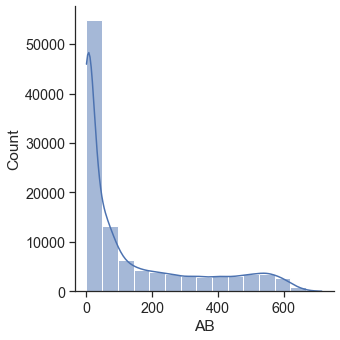

In [24]:
sns.set_theme(style="ticks",
              font_scale=1.3, 
             )
sns.displot(batting["AB"], kde = True, bins = 15)
#Lot's of unqualafied players who only had a few AB's

In [25]:
salaries.isnull().describe()

,yearID,teamID,lgID,playerID,salary
count,26428,26428,26428,26428,26428
unique,1,1,1,1,1
top,False,False,False,False,False
freq,26428,26428,26428,26428,26428


In [26]:
#Salaries start in 1985 and ends in 2016
batting_edit = batting.drop(batting[batting["yearID"] < 1985].index | batting[batting["yearID"] >2016].index)

C:\Users\austi\AppData\Local\Temp/ipykernel_14748/2523837806.py:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  batting_edit = batting.drop(batting[batting["yearID"] < 1985].index | batting[batting["yearID"] >2016].index)


In [27]:
batting_edit["PA"] = batting_edit["AB"] + batting_edit["BB"] + batting_edit["HBP"] + batting_edit["SH"] + batting_edit["SF"]
batting_edit

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA
62254,aasedo01,1985,1,BAL,AL,54,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62255,abregjo01,1985,1,CHN,NL,6,9,0,0,0,...,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0,9.0
62256,ackerji01,1985,1,TOR,AL,61,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62257,adamsri02,1985,1,SFN,NL,54,121,12,23,3,...,1.0,1.0,5,23.0,3.0,1.0,3.0,0.0,2.0,130.0
62258,agostju01,1985,1,CHA,AL,54,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102826,zimmejo02,2016,1,DET,AL,19,4,0,1,0,...,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0,5.0
102827,zimmery01,2016,1,WAS,NL,115,427,60,93,18,...,4.0,1.0,29,104.0,1.0,5.0,0.0,6.0,12.0,467.0
102828,zobribe01,2016,1,CHN,NL,147,523,94,142,31,...,6.0,4.0,96,82.0,6.0,4.0,4.0,4.0,17.0,631.0
102829,zuninmi01,2016,1,SEA,AL,55,164,16,34,7,...,0.0,0.0,21,65.0,0.0,6.0,0.0,1.0,0.0,192.0


In [28]:
batgroup = batting_edit.groupby(["playerID", "yearID"])
batgroup.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA
62254,aasedo01,1985,1,BAL,AL,54,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62255,abregjo01,1985,1,CHN,NL,6,9,0,0,0,...,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0,9.0
62256,ackerji01,1985,1,TOR,AL,61,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62257,adamsri02,1985,1,SFN,NL,54,121,12,23,3,...,1.0,1.0,5,23.0,3.0,1.0,3.0,0.0,2.0,130.0
62258,agostju01,1985,1,CHA,AL,54,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102826,zimmejo02,2016,1,DET,AL,19,4,0,1,0,...,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0,5.0
102827,zimmery01,2016,1,WAS,NL,115,427,60,93,18,...,4.0,1.0,29,104.0,1.0,5.0,0.0,6.0,12.0,467.0
102828,zobribe01,2016,1,CHN,NL,147,523,94,142,31,...,6.0,4.0,96,82.0,6.0,4.0,4.0,4.0,17.0,631.0
102829,zuninmi01,2016,1,SEA,AL,55,164,16,34,7,...,0.0,0.0,21,65.0,0.0,6.0,0.0,1.0,0.0,192.0


In [29]:
salgroup = salaries.groupby(["playerID", "yearID"])
salgroup.agg(np.size)[salgroup.agg(np.size)["teamID"] > 1]

,,teamID,lgID,salary
playerID,yearID,,,
anderla02,1986,2,2,2
barkele01,1987,2,2,2
bereja01,1998,2,2,2
berrada01,1987,2,2,2
berryda01,1995,2,2,2
...,...,...,...,...
watsoal01,1999,2,2,2
wellsbo01,2000,2,2,2
whisema01,1997,2,2,2


In [30]:
salaries.shape

(26428, 5)

In [31]:
batting = batting.fillna(0)
#Values from pre 1911 and othr early seasons
#Likely very little change from an accurate value

In [32]:
batting["PA"] = batting["AB"] + batting["BB"] + batting["HBP"] + batting["SH"] + batting["SF"]
batting

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA
0,abercda01,1871,1,TRO,0,1,4,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,addybo01,1871,1,RC1,0,25,118,30,32,6,...,8.0,1.0,4,0.0,0.0,0.0,0.0,0.0,0.0,122.0
2,allisar01,1871,1,CL1,0,29,137,28,40,4,...,3.0,1.0,2,5.0,0.0,0.0,0.0,0.0,1.0,139.0
3,allisdo01,1871,1,WS3,0,27,133,28,44,10,...,1.0,1.0,0,2.0,0.0,0.0,0.0,0.0,0.0,133.0
4,ansonca01,1871,1,RC1,0,25,120,29,39,11,...,6.0,2.0,2,1.0,0.0,0.0,0.0,0.0,0.0,122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108784,zimmebr02,2020,1,BAL,AL,2,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108785,zimmejo02,2020,1,DET,AL,3,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108786,zimmeky01,2020,1,KCA,AL,16,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108787,zuberty01,2020,1,KCA,AL,23,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
bat_total = batting.groupby("playerID").sum()
bat_total

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA
playerID,,,,,,,,,,,,,,,,,,,,
aardsda01,18084,9,331,4,0,0,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0,5.0
aaronha01,45195,23,3298,12364,2174,3771,624,98,755,2297.0,240.0,73.0,1402,1383.0,293.0,32.0,21.0,121.0,328.0,13940.0
aaronto01,13768,7,437,944,102,216,42,6,13,94.0,9.0,8.0,86,145.0,3.0,0.0,9.0,6.0,36.0,1045.0
aasedo01,25786,13,448,5,0,0,0,0,0,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
abadan01,6010,3,15,21,1,2,0,0,0,0.0,0.0,1.0,4,5.0,0.0,0.0,0.0,0.0,1.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zupofr01,5876,3,16,18,3,3,1,0,0,0.0,0.0,0.0,2,6.0,0.0,0.0,0.0,0.0,0.0,20.0
zuvelpa01,17875,9,209,491,41,109,17,2,2,20.0,2.0,0.0,34,50.0,1.0,2.0,18.0,0.0,8.0,545.0
zuverge01,19551,12,266,142,5,21,2,1,0,7.0,0.0,1.0,9,39.0,0.0,0.0,16.0,0.0,3.0,167.0


In [34]:
batting["PA"].describe()

count    108789.000000
mean        155.872772
std         206.188710
min           0.000000
25%           4.000000
50%          52.000000
75%         249.000000
max         778.000000
Name: PA, dtype: float64

In [35]:
bat_total["G"].describe()

count    19898.000000
mean       277.415167
std        451.286086
min          1.000000
25%         14.000000
50%         78.000000
75%        326.000000
max       3562.000000
Name: G, dtype: float64

In [36]:
bat_total["debut"] = batting.groupby("playerID")["yearID"].min()
bat_total["seasons"] = 1 + batting.groupby("playerID")["yearID"].max() - batting.groupby("playerID")["yearID"].min()
bat_total

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,debut,seasons
playerID,,,,,,,,,,,,,,,,,,,,,
aardsda01,18084,9,331,4,0,0,0,0,0,0.0,...,0,2.0,0.0,0.0,1.0,0.0,0.0,5.0,2004,12
aaronha01,45195,23,3298,12364,2174,3771,624,98,755,2297.0,...,1402,1383.0,293.0,32.0,21.0,121.0,328.0,13940.0,1954,23
aaronto01,13768,7,437,944,102,216,42,6,13,94.0,...,86,145.0,3.0,0.0,9.0,6.0,36.0,1045.0,1962,10
aasedo01,25786,13,448,5,0,0,0,0,0,0.0,...,0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,1977,14
abadan01,6010,3,15,21,1,2,0,0,0,0.0,...,4,5.0,0.0,0.0,0.0,0.0,1.0,25.0,2001,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zupofr01,5876,3,16,18,3,3,1,0,0,0.0,...,2,6.0,0.0,0.0,0.0,0.0,0.0,20.0,1957,5
zuvelpa01,17875,9,209,491,41,109,17,2,2,20.0,...,34,50.0,1.0,2.0,18.0,0.0,8.0,545.0,1982,10
zuverge01,19551,12,266,142,5,21,2,1,0,7.0,...,9,39.0,0.0,0.0,16.0,0.0,3.0,167.0,1951,9


In [37]:
#A qualafied hitter must have 3.1 PA's per team game played. I have determined team games played based on the length of their debut season.
bat_total = bat_total.drop(bat_total[(bat_total["PA"] / (70 * bat_total["seasons"])) < 3.1].index & bat_total[bat_total["debut"] < 1884].index)
bat_total = bat_total.drop(bat_total[(bat_total["PA"] / (112 * bat_total["seasons"])) < 3.1].index & bat_total[(bat_total["debut"] < 1890) & (bat_total["debut"] >= 1884)].index)
bat_total = bat_total.drop(bat_total[(bat_total["PA"] / (132 * bat_total["seasons"])) < 3.1].index & bat_total[(bat_total["debut"] < 1903) & (bat_total["debut"] >= 1890)].index)    
bat_total = bat_total.drop(bat_total[(bat_total["PA"] / (154 * bat_total["seasons"])) < 3.1].index & bat_total[(bat_total["debut"] < 1961) & (bat_total["debut"] >= 1903)].index)  
bat_total = bat_total.drop(bat_total[(bat_total["PA"] / (162 * bat_total["seasons"])) < 3.1].index & bat_total[bat_total["debut"] >= 1961].index)                     

C:\Users\austi\AppData\Local\Temp/ipykernel_14748/3091929332.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  bat_total = bat_total.drop(bat_total[(bat_total["PA"] / (70 * bat_total["seasons"])) < 3.1].index & bat_total[bat_total["debut"] < 1884].index)
C:\Users\austi\AppData\Local\Temp/ipykernel_14748/3091929332.py:2: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  bat_total = bat_total.drop(bat_total[(bat_total["PA"] / (112 * bat_total["seasons"])) < 3.1].index & bat_total[(bat_total["debut"] < 1890) & (bat_total["debut"] >= 1884)].index)
C:\Users\austi\AppData\Local\Temp/ipykernel_14748/3091929332.py:3: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a log

In [38]:
bat_total.describe()  

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,debut,seasons
count,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,...,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
mean,25040.354103,13.639818,1445.594225,5442.846505,857.709726,1546.984802,263.715805,62.320669,124.044073,730.059271,...,557.974164,598.273556,32.331307,41.582067,55.468085,24.653495,71.544073,6122.524316,1932.822188,12.402736
std,10826.225289,5.849409,730.718433,2690.482865,461.794632,821.137272,158.440093,47.597330,147.173314,463.332070,...,402.900637,495.954675,60.054767,38.844499,75.150765,34.448271,89.225308,3086.501042,46.912987,5.452476
min,1876.000000,1.000000,54.000000,219.000000,22.000000,53.000000,3.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,227.000000,1871.000000,1.000000
25%,17265.000000,10.000000,897.500000,3496.000000,541.750000,935.250000,141.000000,27.250000,18.000000,367.000000,...,237.250000,221.250000,0.000000,15.000000,0.000000,0.000000,0.000000,3828.750000,1887.000000,9.000000
50%,25202.000000,14.000000,1449.500000,5368.500000,821.500000,1499.500000,244.500000,50.500000,58.500000,681.000000,...,488.000000,436.000000,0.000000,33.000000,23.000000,0.000000,8.500000,6051.500000,1924.000000,13.000000
75%,32790.250000,18.000000,1984.750000,7402.750000,1162.750000,2127.500000,372.250000,86.750000,189.750000,1026.250000,...,801.750000,894.500000,44.750000,54.750000,82.750000,51.000000,135.500000,8302.750000,1978.000000,16.000000
max,57754.000000,33.000000,3562.000000,14053.000000,2295.000000,4256.000000,792.000000,309.000000,762.000000,2297.000000,...,2558.000000,2597.000000,688.000000,285.000000,512.000000,128.000000,399.000000,15861.000000,2017.000000,33.000000


In [39]:
bat_total = bat_total.drop(["yearID", "stint"], axis = 1)

In [40]:
bat_total.describe()

,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,debut,seasons
count,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
mean,1445.594225,5442.846505,857.709726,1546.984802,263.715805,62.320669,124.044073,730.059271,162.500000,33.813070,557.974164,598.273556,32.331307,41.582067,55.468085,24.653495,71.544073,6122.524316,1932.822188,12.402736
std,730.718433,2690.482865,461.794632,821.137272,158.440093,47.597330,147.173314,463.332070,164.955261,45.154563,402.900637,495.954675,60.054767,38.844499,75.150765,34.448271,89.225308,3086.501042,46.912987,5.452476
min,54.000000,219.000000,22.000000,53.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,227.000000,1871.000000,1.000000
25%,897.500000,3496.000000,541.750000,935.250000,141.000000,27.250000,18.000000,367.000000,45.000000,0.000000,237.250000,221.250000,0.000000,15.000000,0.000000,0.000000,0.000000,3828.750000,1887.000000,9.000000
50%,1449.500000,5368.500000,821.500000,1499.500000,244.500000,50.500000,58.500000,681.000000,108.000000,15.000000,488.000000,436.000000,0.000000,33.000000,23.000000,0.000000,8.500000,6051.500000,1924.000000,13.000000
75%,1984.750000,7402.750000,1162.750000,2127.500000,372.250000,86.750000,189.750000,1026.250000,233.000000,55.000000,801.750000,894.500000,44.750000,54.750000,82.750000,51.000000,135.500000,8302.750000,1978.000000,16.000000
max,3562.000000,14053.000000,2295.000000,4256.000000,792.000000,309.000000,762.000000,2297.000000,1406.000000,335.000000,2558.000000,2597.000000,688.000000,285.000000,512.000000,128.000000,399.000000,15861.000000,2017.000000,33.000000


In [41]:
bat_total.shape

(658, 20)

<AxesSubplot:xlabel='debut', ylabel='SO'>

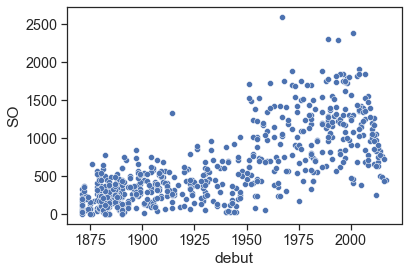

In [42]:
sns.scatterplot(data = bat_total, x = "debut", y = "SO")
#Notice how K's increase over time as modern players are less concerned with strikeouts than before and games increased

In [43]:
bat_total.columns

Index(['G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO',
       'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'PA', 'debut', 'seasons'],
      dtype='object')

In [44]:
bat_total["BA"] = bat_total["H"] / bat_total["AB"]
bat_total["OBP"] = (bat_total["H"] + bat_total["BB"] + bat_total["HBP"])/bat_total["PA"]
bat_total["SLG"] = ((bat_total["H"] - bat_total["2B"] - bat_total["3B"] - bat_total["HR"]) + (2 * bat_total["2B"]) + (3 * bat_total["3B"]) + (4 * bat_total["HR"]))
bat_total["OPS"] = bat_total["OBP"] + bat_total["SLG"]
#Rate stats> OPS is considered to be the best for evaluating perfomance, however advanced stats like OPS+ or wRC+ can be a better measure.

In [45]:
bat_tot2 = bat_total.drop(["IBB", "HBP", "SH", "SF", "GIDP", "seasons", "AB"], axis = 1)

In [46]:
#sns.pairplot(bat_tot2)

In [47]:
batcorr = bat_total.corr()

<AxesSubplot:xlabel='SB', ylabel='CS'>

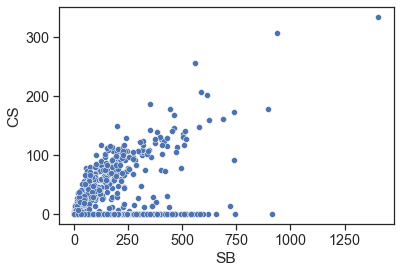

In [48]:
sns.scatterplot(data = bat_total, x = "SB", y = "CS")

In [49]:
bat_year = batting.groupby("yearID").sum()
bat_year

,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA
yearID,,,,,,,,,,,,,,,,,,,
1871,115,2296,10822,2659,3101,434,239,47,1783.0,441.0,123.0,393,175.0,0.0,0.0,0.0,0.0,74.0,11215.0
1872,172,3306,15665,3390,4467,581,145,37,2132.0,269.0,134.0,263,265.0,0.0,0.0,0.0,0.0,97.0,15928.0
1873,128,3604,16959,3580,4926,570,211,47,2331.0,314.0,131.0,335,278.0,0.0,0.0,0.0,0.0,122.0,17294.0
1874,126,4199,19104,3470,5224,634,194,40,2252.0,242.0,97.0,238,357.0,0.0,0.0,0.0,0.0,107.0,19342.0
1875,247,6248,26833,4234,6812,839,273,40,2710.0,629.0,320.0,249,675.0,0.0,0.0,0.0,0.0,142.0,27082.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,1620,70451,165561,21744,42276,8254,873,5610,20745.0,2537.0,1001.0,15088,38982.0,932.0,1651.0,1025.0,1214.0,3719.0,184539.0
2017,1638,70743,165567,22582,42215,8397,795,6105,21558.0,2527.0,934.0,15829,40104.0,970.0,1763.0,925.0,1168.0,3804.0,185252.0
2018,1705,71590,165432,21630,41018,8264,847,5585,20606.0,2474.0,958.0,15686,41207.0,929.0,1922.0,823.0,1235.0,3457.0,185098.0


In [50]:
bat_year["BA"] = bat_year["H"] / bat_year["AB"]
bat_year["OBP"] = (bat_year["H"] + bat_year["BB"] + bat_year["HBP"])/bat_year["PA"]
bat_year["SLG"] = ((bat_year["H"] - bat_year["2B"] - bat_year["3B"] - bat_year["HR"]) + (2 * bat_year["2B"]) + (3 * bat_year["3B"]) + (4 * bat_year["HR"]))
bat_year["OPS"] = bat_year["OBP"] + bat_year["SLG"]

<AxesSubplot:xlabel='yearID', ylabel='BA'>

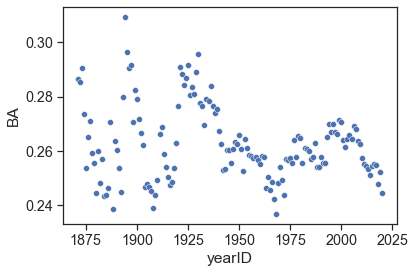

In [62]:
sns.scatterplot(data = bat_year, x = bat_year.index, y = "BA")
#Note drop after 1900, decline from mid 20's to 70's and decline since 2000.

In [69]:
pitch_year = pitching.groupby("yearID").sum()
pitch_year.describe()

,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,348.806667,1468.126667,1468.126667,7573.073333,2952.720000,945.806667,135.033333,478.033333,79017.786667,26386.386667,...,507.593333,830.953333,749.280000,94.413333,112735.193333,2005.793333,13404.886667,518.026667,416.973333,1077.120000
std,235.257411,625.289595,625.289595,5845.075103,1243.399557,589.141141,73.646299,448.517295,33472.147242,10829.743975,...,599.287072,504.642944,486.680016,109.080365,47653.997278,1577.964441,5463.801716,748.094806,592.985269,1600.280713
min,17.000000,120.000000,120.000000,277.000000,254.000000,29.000000,4.000000,1.000000,6750.000000,3101.000000,...,0.000000,124.000000,0.000000,0.000000,11215.000000,16.000000,1904.000000,0.000000,0.000000,0.000000
25%,210.250000,1213.250000,1213.250000,3490.500000,2452.500000,474.750000,72.250000,102.000000,65472.000000,20315.250000,...,0.000000,401.250000,443.000000,33.250000,88681.500000,764.250000,10065.750000,0.000000,0.000000,0.000000
50%,267.500000,1231.000000,1231.000000,5252.500000,2480.000000,955.000000,137.000000,249.000000,66604.000000,23979.500000,...,0.000000,562.000000,692.000000,51.000000,96061.500000,1489.500000,11944.000000,0.000000,0.000000,0.000000
75%,452.750000,2100.250000,2100.250000,10757.750000,4203.000000,1264.750000,178.500000,896.000000,112640.750000,36535.000000,...,1176.500000,1278.500000,870.000000,152.500000,159869.750000,3340.250000,17790.500000,1485.750000,1171.750000,3085.500000
max,1037.000000,2431.000000,2431.000000,21429.000000,4864.000000,2885.000000,348.000000,1292.000000,130960.000000,45327.000000,...,1477.000000,2183.000000,1984.000000,924.000000,190261.000000,4820.000000,24971.000000,1986.000000,1514.000000,3983.000000


In [67]:
pitch_year.columns

Index(['stint', 'W', 'L', 'G', 'GS', 'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER',
       'HR', 'BB', 'SO', 'BAOpp', 'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF',
       'R', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [71]:
pitch_year = pitch_year.drop(["stint", "BK", "GF", "SH", "SF", "GIDP"], axis = 1)

In [72]:
pitch_year

,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BFP,R
yearID,,,,,,,,,,,,,,,,,,,,
1871,120,120,277,254,231,4,4,6750,3101,1055,47,393,175,0.000,113.84,0.0,208,0.0,11215.0,2659
1872,178,178,405,366,327,10,7,9858,4467,1335,37,263,265,0.000,115.45,0.0,202,0.0,15928.0,3390
1873,197,197,434,398,362,8,9,10754,4926,1353,47,335,278,0.000,107.60,0.0,124,0.0,17294.0,3580
1874,231,231,490,464,439,15,3,12509,5224,1015,40,238,357,0.000,69.52,0.0,127,0.0,19342.0,3470
1875,335,335,763,690,621,49,18,18571,6812,1531,40,249,675,0.000,202.97,0.0,330,0.0,27082.0,4234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,2427,2427,20159,4856,83,36,1276,129919,42276,20160,5610,15088,38982,220.818,4321.88,932.0,1808,1651.0,184580.0,21744
2017,2430,2430,20517,4860,59,27,1179,129771,42215,20947,6105,15829,40104,226.348,4739.06,970.0,1810,1763.0,185295.0,22582
2018,2431,2431,21197,4862,42,19,1244,130467,41018,20051,5585,15686,41207,237.591,5233.87,929.0,1847,1922.0,185139.0,21630


In [77]:
bat_year[:4]

,stint,G,AB,R,H,2B,3B,HR,RBI,SB,...,IBB,HBP,SH,SF,GIDP,PA,BA,OBP,SLG,OPS
yearID,,,,,,,,,,,,,,,,,,,,,
1871,115,2296,10822,2659,3101,434,239,47,1783.0,441.0,...,0.0,0.0,0.0,0.0,74.0,11215.0,0.286546,0.311547,4154,4154.311547
1872,172,3306,15665,3390,4467,581,145,37,2132.0,269.0,...,0.0,0.0,0.0,0.0,97.0,15928.0,0.285158,0.296961,5449,5449.296961
1873,128,3604,16959,3580,4926,570,211,47,2331.0,314.0,...,0.0,0.0,0.0,0.0,122.0,17294.0,0.290465,0.304210,6059,6059.304210
1874,126,4199,19104,3470,5224,634,194,40,2252.0,242.0,...,0.0,0.0,0.0,0.0,107.0,19342.0,0.273451,0.282391,6366,6366.282391


In [78]:
pitch_year[:4]

,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BFP,R
yearID,,,,,,,,,,,,,,,,,,,,
1871,120,120,277,254,231,4,4,6750,3101,1055,47,393,175,0.0,113.84,0.0,208,0.0,11215.0,2659
1872,178,178,405,366,327,10,7,9858,4467,1335,37,263,265,0.0,115.45,0.0,202,0.0,15928.0,3390
1873,197,197,434,398,362,8,9,10754,4926,1353,47,335,278,0.0,107.60,0.0,124,0.0,17294.0,3580
1874,231,231,490,464,439,15,3,12509,5224,1015,40,238,357,0.0,69.52,0.0,127,0.0,19342.0,3470


In [80]:
pitch_year.drop(["BAOpp", "ERA"], axis = 1)

,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,IBB,WP,HBP,BFP,R
yearID,,,,,,,,,,,,,,,,,,
1871,120,120,277,254,231,4,4,6750,3101,1055,47,393,175,0.0,208,0.0,11215.0,2659
1872,178,178,405,366,327,10,7,9858,4467,1335,37,263,265,0.0,202,0.0,15928.0,3390
1873,197,197,434,398,362,8,9,10754,4926,1353,47,335,278,0.0,124,0.0,17294.0,3580
1874,231,231,490,464,439,15,3,12509,5224,1015,40,238,357,0.0,127,0.0,19342.0,3470
1875,335,335,763,690,621,49,18,18571,6812,1531,40,249,675,0.0,330,0.0,27082.0,4234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,2427,2427,20159,4856,83,36,1276,129919,42276,20160,5610,15088,38982,932.0,1808,1651.0,184580.0,21744
2017,2430,2430,20517,4860,59,27,1179,129771,42215,20947,6105,15829,40104,970.0,1810,1763.0,185295.0,22582
2018,2431,2431,21197,4862,42,19,1244,130467,41018,20051,5585,15686,41207,929.0,1847,1922.0,185139.0,21630


In [83]:
era = (9 * pitch_year["ER"]) / (pitch_year["IPouts"] / 3)
era


yearID
1871    4.220000
1872    3.656421
1873    3.396969
1874    2.190823
1875    2.225890
          ...   
2016    4.189687
2017    4.358208
2018    4.149532
2019    4.505458
2020    4.453260
Length: 150, dtype: float64

In [84]:
pitch_year["ERA"] = era

<AxesSubplot:xlabel='yearID', ylabel='ERA'>

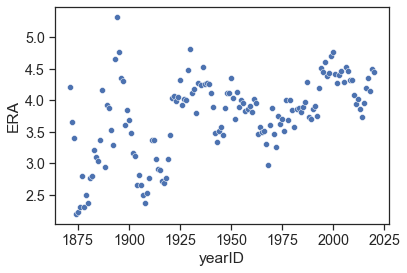

In [93]:
sns.scatterplot(data = pitch_year, x = pitch_year.index, y = "ERA")
#ERA seems in sync with BA however it is not still in decline (rise of stats like OBP may be the cause?)

<AxesSubplot:xlabel='yearID', ylabel='CG'>

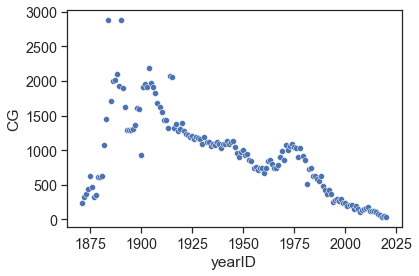

In [94]:
sns.scatterplot(data = pitch_year, x = pitch_year.index, y = "CG")
#Complete games decreasing as pitcher usage changes

After exploring the data more I am interested in the trends throughout the history of baseball. The swings between offense and defense over the years is interesting and a current hot topic in baseball. The start of the 2021 season was compared to the deadball era due to historic offensive lows but the trends appear closer to other era's throughout baseball. I want to see if the reactions to declining offense in baseball is truly a cause for concern, or if the media is overexaggerating the problem.

## Task 2/3 Analysis Pipeline and Method Chaining